In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
torch.__version__

'1.11.0'

In [2]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 8, 8)
        self.conv2 = nn.Conv2d(8, 16, 1)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16272, 120)  # 5*5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 1024 * 8)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x =F.relu(self.conv1(x))
        # If the size is a square, you can specify with a single number
        x = F.relu(self.conv2(x))
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 8, kernel_size=(8, 8), stride=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
  (fc1): Linear(in_features=16272, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=8192, bias=True)
)


In [3]:
input = torch.randn(1, 1, 8, 1024)
out = net(input)
print(out)

tensor([[ 0.0448,  0.0743,  0.0808,  ..., -0.0155, -0.0372, -0.0448]],
       grad_fn=<AddmmBackward0>)


In [4]:
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()

In [5]:
writer.add_graph(net, input)
writer.close()

In [6]:
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [7]:
for epoch in range(5):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(range(2000)):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = torch.randn(1, 1, 8, 1024), torch.ones( 1, 8 * 1024)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        writer.add_scalar("Loss/train", loss, epoch)

        # print statistics
        running_loss += loss.item()
        if i % 200 == 199:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0


[1,   200] loss: 0.100
[1,   400] loss: 0.100
[1,   600] loss: 0.100
[1,   800] loss: 0.100
[1,  1000] loss: 0.099
[1,  1200] loss: 0.099
[1,  1400] loss: 0.099
[1,  1600] loss: 0.099
[1,  1800] loss: 0.098
[1,  2000] loss: 0.098
[2,   200] loss: 0.098
[2,   400] loss: 0.097
[2,   600] loss: 0.097
[2,   800] loss: 0.096
[2,  1000] loss: 0.095
[2,  1200] loss: 0.094
[2,  1400] loss: 0.093
[2,  1600] loss: 0.091
[2,  1800] loss: 0.089
[2,  2000] loss: 0.087
[3,   200] loss: 0.084
[3,   400] loss: 0.081
[3,   600] loss: 0.077
[3,   800] loss: 0.073
[3,  1000] loss: 0.068
[3,  1200] loss: 0.062
[3,  1400] loss: 0.056
[3,  1600] loss: 0.050
[3,  1800] loss: 0.044
[3,  2000] loss: 0.039
[4,   200] loss: 0.033
[4,   400] loss: 0.028
[4,   600] loss: 0.023
[4,   800] loss: 0.019
[4,  1000] loss: 0.016
[4,  1200] loss: 0.013
[4,  1400] loss: 0.010
[4,  1600] loss: 0.008
[4,  1800] loss: 0.006
[4,  2000] loss: 0.005
[5,   200] loss: 0.004
[5,   400] loss: 0.003
[5,   600] loss: 0.003
[5,   800] 

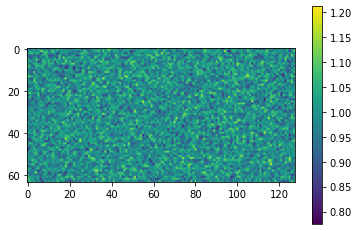

In [8]:
import matplotlib.pyplot as plt
result = net(torch.randn(1, 1, 8, 1024)).detach().numpy()
plt.imshow(result.reshape((-1, 128)))
plt.colorbar()

(array([  1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          2.,   0.,   0.,   1.,   2.,   2.,   2.,   0.,   1.,   1.,   1.,
          2.,   2.,   2.,   2.,   1.,   3.,   1.,   1.,   4.,   4.,   5.,
          0.,   2.,   2.,   4.,   3.,   2.,   3.,   6.,   9.,   8.,  10.,
          7.,   6.,   5.,  12.,   3.,   8.,   8.,  14.,   9.,  13.,  16.,
         14.,  11.,  16.,  22.,  13.,  19.,  19.,  26.,  30.,  22.,  18.,
         25.,  39.,  20.,  22.,  31.,  30.,  26.,  25.,  21.,  28.,  32.,
         43.,  45.,  41.,  32.,  42.,  46.,  33.,  38.,  38.,  46.,  35.,
         42.,  52.,  57.,  42.,  54.,  47.,  50.,  52.,  57.,  71.,  71.,
         63.,  49.,  65.,  62.,  63.,  79.,  85.,  59.,  85.,  65.,  71.,
         82.,  87.,  74.,  77.,  91.,  78.,  99.,  72.,  86.,  98.,  91.,
         85.,  93.,  94.,  79.,  81.,  91., 102.,  78.,  77.,  81.,  98.,
         94.,  80.,  85.,  87.,  88.,  96.,  81.,  91.,  87.,  85.,  66.,
         85.,  81.,  65.,  83.,  77., 

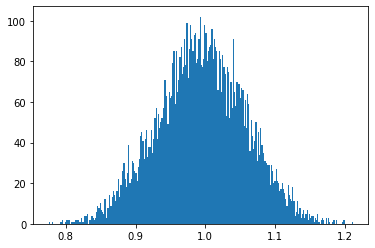

In [9]:
plt.hist(result.reshape((-1,1)), bins=256)

In [11]:
torch.frombuffer()

TypeError: frombuffer() missing 2 required positional argument: "buffer", "dtype"

In [13]:
b'\x57'

b'W'